In [1]:
import pandas as pd

# Replace with your actual file path
file_path = 'Budget\Budget_2024_Qtr1.1.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display basic info and first few rows
print(df.info())
print(df.head())


d:\School\ITU\Coding\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15543 entries, 0 to 15542
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        15543 non-null  int64  
 1   Quarter                     15543 non-null  object 
 2   Month                       15543 non-null  object 
 3   Day                         15543 non-null  int64  
 4   Customer.Customer Code      15543 non-null  object 
 5   Country.Country Name        15543 non-null  object 
 6   Sum of Invoiced Amount EUR  15543 non-null  float64
 7   Sum of Invoiced Qty         15543 non-null  float64
 8   Item.Item Code              15543 non-null  object 
 9   Item.Sales Model            15543 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB
None
   Year Quarter    Month  Day Customer.Customer Code  \
0  2024   Qtr 1  January    1                 100081   
1  2024   Qtr 1  January    

Datasets loader

In [4]:
import pandas as pd

def load_data(file_path):
    """
    Loads and returns the invoice data from a CSV file.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded DataFrame with invoice data.
    """
    try:
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()

        # Convert month names to month numbers if necessary
        if df['Month'].dtype == object:
            df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month

        # Create a proper datetime column
        if {'Year', 'Month', 'Day'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

        return df

    except Exception as e:
        print(f"Error loading file: {e}")
        return None


d:\School\ITU\Coding\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
test = load_data('Budget\Budget_2024_Qtr1.1.csv')
if test is not None:
    print(test.head())


   Year Quarter  Month  Day Customer.Customer Code      Country.Country Name  \
0  2024   Qtr 1      1    1                 100081                    France   
1  2024   Qtr 1      1    1                 100535                    Kuwait   
2  2024   Qtr 1      1    1                 100535                    Kuwait   
3  2024   Qtr 1      1    1                 103641            United Kingdom   
4  2024   Qtr 1      1    1                 103707  United States of America   

   Sum of Invoiced Amount EUR  Sum of Invoiced Qty    Item.Item Code  \
0                   4080.0000                  3.0  80241330_Renewal   
1                   1329.0000                  1.0  82242086_Renewal   
2                   1329.0000                  1.0  82242100_Renewal   
3                   1553.4207                  1.0          82242100   
4                      0.0000                  0.0          82242101   

  Item.Sales Model       Date  
0     Subscription 2024-01-01  
1     Subscription 202

In [6]:
def save_df(df, file_name):
    df.to_csv("Working_df/"+file_name+".csv", index=False)

Datasets combining function

In [7]:
import pandas as pd

def combine_dataframes(dfs):
    """
    Combines a list of DataFrames into one.

    Args:
        dfs (list of pd.DataFrame): List of DataFrames to combine.

    Returns:
        pd.DataFrame: Combined DataFrame.
    """
    return pd.concat(dfs, ignore_index=True)


In [8]:
Qtr1_1 = load_data('Budget\Budget_2024_Qtr1.1.csv')
Qtr1_2 = load_data('Budget\Budget_2024_Qtr1.2.csv')
Qtr1_3 = load_data('Budget\Budget_2024_Qtr1.3.csv')
Qtr2_1 = load_data('Budget\Budget_2024_Qtr2.1.csv')
Qtr2_2 = load_data('Budget\Budget_2024_Qtr2.2.csv')
Qtr2_3 = load_data('Budget\Budget_2024_Qtr2.3.csv')
Qtr3_1 = load_data('Budget\Budget_2024_Qtr3.1.csv')
Qtr3_2 = load_data('Budget\Budget_2024_Qtr3.2.csv')
Qtr3_3 = load_data('Budget\Budget_2024_Qtr3.3.csv')
Qtr4_1 = load_data('Budget\Budget_2024_Qtr4.1.csv')
Qtr4_2 = load_data('Budget\Budget_2024_Qtr4.2.csv')
Qtr4_3 = load_data('Budget\Budget_2024_Qtr4.3.csv')

# Step 2: Combine them
Bud_24 = combine_dataframes([Qtr1_1, Qtr1_2, Qtr1_3,
                              Qtr2_1, Qtr2_2, Qtr2_3,
                              Qtr3_1, Qtr3_2, Qtr3_3,
                              Qtr4_1, Qtr4_2, Qtr4_3])

print(Bud_24.shape)
print(Bud_24.head())

(191495, 11)
   Year Quarter  Month  Day Customer.Customer Code      Country.Country Name  \
0  2024   Qtr 1      1    1                 100081                    France   
1  2024   Qtr 1      1    1                 100535                    Kuwait   
2  2024   Qtr 1      1    1                 100535                    Kuwait   
3  2024   Qtr 1      1    1                 103641            United Kingdom   
4  2024   Qtr 1      1    1                 103707  United States of America   

   Sum of Invoiced Amount EUR  Sum of Invoiced Qty    Item.Item Code  \
0                   4080.0000                  3.0  80241330_Renewal   
1                   1329.0000                  1.0  82242086_Renewal   
2                   1329.0000                  1.0  82242100_Renewal   
3                   1553.4207                  1.0          82242100   
4                      0.0000                  0.0          82242101   

  Item.Sales Model       Date  
0     Subscription 2024-01-01  
1     Sub

Loading Multiple files 

In [9]:
import os
import glob
import re
import pandas as pd

def load_data_by_type_and_year(data_type, year, loader_fn):
    """
    Loads and combines all matching data files for a given type and year.

    Args:
        data_type (str): Either 'Budget' or 'Actuals'
        year (int): The year to match (e.g., 2024)
        loader_fn (callable): A function like `load_invoice_data()` to load each CSV

    Returns:
        pd.DataFrame: Combined DataFrame from all matching files
    """
    # Normalize folder name (no trailing slashes or spaces)
    folder = data_type.strip()

    # Use glob to find all CSVs in the folder
    all_files = glob.glob(os.path.join(folder, '*.csv'))

    # Regex pattern to match files like Budget_2024_Qtr1.2.csv or Actuals_2023_Qtr4.csv
    pattern = re.compile(rf"{data_type.strip()}[_\s]*{year}_Qtr\d+(\.\d+)?\.csv", re.IGNORECASE)

    # Filter files that match the pattern
    matching_files = [f for f in all_files if pattern.search(os.path.basename(f))]

    if not matching_files:
        print(f"No matching files found for {data_type} {year}")
        return pd.DataFrame()

    # Load each file using your loader function
    loaded_dfs = [loader_fn(f) for f in matching_files]

    # Combine all loaded DataFrames
    return pd.concat(loaded_dfs, ignore_index=True)


In [10]:
# Load 2024 budget data
budget_2024 = load_data_by_type_and_year('Budget', 2024, load_data)

# Load 2023 actuals data
actuals_2023 = load_data_by_type_and_year('Actuals', 2023, load_data)


In [11]:
"""
Example usage:
# Load 2017-2024 budget data
budget_all = pd.concat([
    load_data_by_type_and_year('Budget', y, load_data)
    for y in [2017, 2024]
], ignore_index=True)"""

actuals_all = pd.concat([
    load_data_by_type_and_year('Actuals', y, load_data)
    for y in [2017,2018,2019,2020,2021,2022, 2023, 2024]
], ignore_index=True)

In [12]:
print(actuals_all.head())

   Year Quarter  Month  Day Customer.Customer Code Country.Country Name  \
0  2017   Qtr 1      1    1                 100002              Germany   
1  2017   Qtr 1      1    1                 100002              Germany   
2  2017   Qtr 1      1    1                 100002              Germany   
3  2017   Qtr 1      1    1                 100002              Germany   
4  2017   Qtr 1      1    1                 100002              Germany   

   Sum of Invoiced Amount EUR  Sum of Invoiced Qty    Item.Item Code  \
0                     12000.0                 10.0  80240001_Renewal   
1                      1200.0                  1.0  80240004_Renewal   
2                         0.0                  8.0  80241047_Renewal   
3                      1200.0                  6.0  80243010_Renewal   
4                       200.0                  1.0  80243020_Renewal   

  Item.Sales Model       Date  
0     Subscription 2017-01-01  
1     Subscription 2017-01-01  
2     Subscription 2

In [13]:
actuals_all.to_csv("Working_df/Actuals_all.csv", index=False)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_weekly_sales_trend(df):
    """
    Plots weekly sales trend based on 'Sum of Invoiced Amount EUR' column.

    Parameters:
    df (pd.DataFrame): DataFrame containing at least 'Date' and 'Sum of Invoiced Amount EUR' columns.
    """

    # Ensure Date is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Create Week column (start of the week)
    df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

    # Group by Week
    weekly_sales = df.groupby('Week')['Sum of Invoiced Amount EUR'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=weekly_sales, x='Week', y='Sum of Invoiced Amount EUR', marker='o')
    plt.title('Weekly Sales Trend', fontsize=16)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Total Invoiced Amount (EUR)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


d:\School\ITU\Coding\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\School\ITU\Coding\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


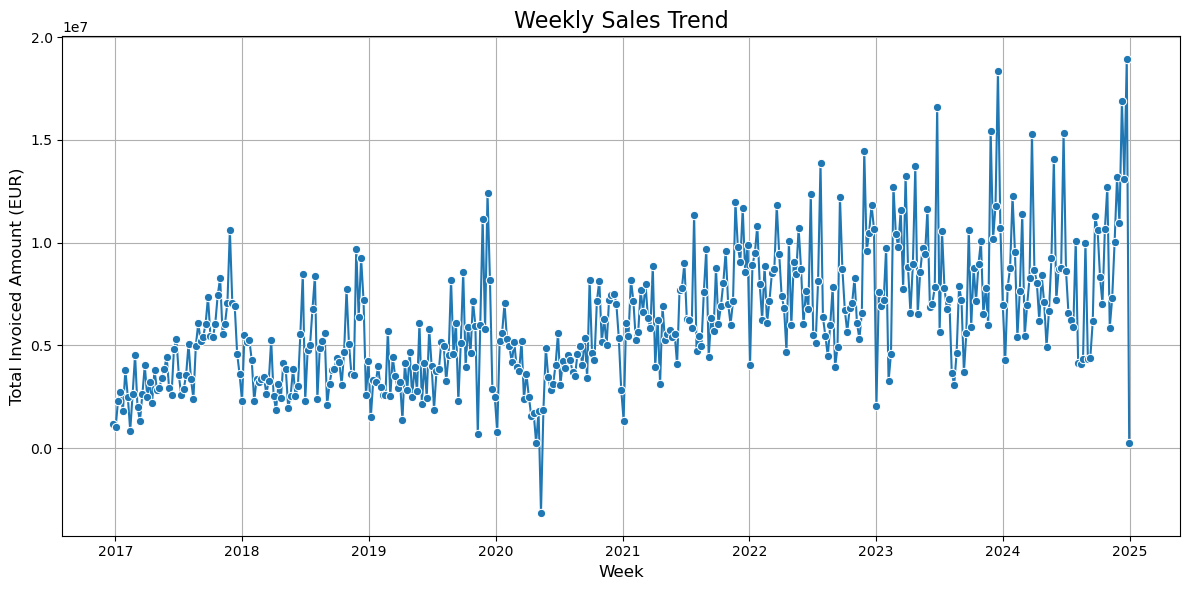

In [15]:
plot_weekly_sales_trend(actuals_all)

Dataframe analisys

In [16]:
# Check for missing data
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Unique 
print(df['Country.Country Name'].unique())


NameError: name 'df' is not defined

In [17]:
# split the item code column into two parts
# Assuming the column name is 'Item.Item Code'  

def split_item_code_column(df, column_name='Item.Item Code'):
    """
    Splits the item code column into two parts:
    - item_code: numeric part before underscore
    - item_suffix: optional text after underscore (or NaN if missing)

    Returns:
        pd.DataFrame: DataFrame with two new columns: 'item_code' and 'item_suffix'.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Extract using regex
    extracted = df[column_name].str.extract(r'(?P<item_code>[^_]+)(?:_(?P<item_suffix>.+))?')

    # Add to original DataFrame
    df['item_code'] = extracted['item_code']
    df['item_suffix'] = extracted['item_suffix']

    return df


In [ ]:
Bud_24 = split_item_code_column(Bud_24)
print(Bud_24.head())

   Year Quarter  Month  Day Customer.Customer Code      Country.Country Name  \
0  2024   Qtr 1      1    1                 100081                    France   
1  2024   Qtr 1      1    1                 100535                    Kuwait   
2  2024   Qtr 1      1    1                 100535                    Kuwait   
3  2024   Qtr 1      1    1                 103641            United Kingdom   
4  2024   Qtr 1      1    1                 103707  United States of America   

   Sum of Invoiced Amount EUR  Sum of Invoiced Qty    Item.Item Code  \
0                   4080.0000                  3.0  80241330_Renewal   
1                   1329.0000                  1.0  82242086_Renewal   
2                   1329.0000                  1.0  82242100_Renewal   
3                   1553.4207                  1.0          82242100   
4                      0.0000                  0.0          82242101   

  Item.Sales Model       Date item_code item_suffix  
0     Subscription 2024-01-01  8

In [18]:
import pandas as pd
import numpy as np

def preprocess_weekly_sales(df):
    # --- 1. Parse Date and Create Weekly Columns ---
    df['Date'] = pd.to_datetime(df['Date'])
    df['week_start'] = df['Date'] - pd.to_timedelta(df['Date'].dt.dayofweek, unit='d')
    
    # ISO calendar week number and year
    df['year'] = df['Date'].dt.isocalendar().year
    df['week'] = df['Date'].dt.isocalendar().week

    # --- 2. Weekly Aggregation ---
    weekly_df = df.groupby(['year', 'week', 'week_start', 'Customer.Customer Code', 'item_code']).agg({
        'Sum of Invoiced Amount EUR': 'sum',
        'Sum of Invoiced Qty': 'sum',
        'Country.Country Name': 'first',
        'Item.Sales Model': 'first',
        'item_suffix': 'first'
    }).reset_index()

    # --- 3. Fill Missing Suffix ---
    weekly_df['item_suffix'] = weekly_df['item_suffix'].fillna('None')

    # --- 4. Sort for Lag/Rolling ---
    weekly_df = weekly_df.sort_values(['Customer.Customer Code', 'item_code', 'year', 'week'])

    # --- 5. Lag Features ---
    weekly_df['lag_1w'] = weekly_df.groupby(['Customer.Customer Code', 'item_code'])['Sum of Invoiced Amount EUR'].shift(1)
    weekly_df['lag_4w'] = weekly_df.groupby(['Customer.Customer Code', 'item_code'])['Sum of Invoiced Amount EUR'].shift(4)

    # --- 6. Rolling Window Features (4, 8 weeks) ---
    weekly_df['roll_4w'] = weekly_df.groupby(['Customer.Customer Code', 'item_code'])['Sum of Invoiced Amount EUR'].transform(lambda x: x.rolling(window=4).mean())
    weekly_df['roll_8w'] = weekly_df.groupby(['Customer.Customer Code', 'item_code'])['Sum of Invoiced Amount EUR'].transform(lambda x: x.rolling(window=8).mean())

    # --- 7. Categorical Encoding ---
    weekly_df['country_code'] = weekly_df['Country.Country Name'].astype('category').cat.codes
    weekly_df['item_suffix_code'] = weekly_df['item_suffix'].astype('category').cat.codes
    weekly_df['sales_model_code'] = weekly_df['Item.Sales Model'].astype('category').cat.codes

    return weekly_df


In [ ]:
Bud_24_changed = preprocess_weekly_sales(Bud_24) 
print(Bud_24_changed.head())
print(Bud_24_changed.info()) 

       year  week week_start Customer.Customer Code item_code  \
20957  2024     8 2024-02-19                 100002  80240001   
39360  2024    14 2024-04-01                 100002  80240001   
51686  2024    18 2024-04-29                 100002  80240001   
84799  2024    28 2024-07-08                 100002  80240001   
96730  2024    32 2024-08-05                 100002  80240001   

       Sum of Invoiced Amount EUR  Sum of Invoiced Qty Country.Country Name  \
20957                      1200.0                  1.0              Germany   
39360                      1200.0                  1.0              Germany   
51686                      3600.0                  3.0              Germany   
84799                      1200.0                  1.0              Germany   
96730                      1200.0                  1.0              Germany   

      Item.Sales Model item_suffix  lag_1w  lag_4w  roll_4w  roll_8w  \
20957     Subscription     Renewal     NaN     NaN      NaN   

Working with sales type to make into feature

In [ ]:
print(Bud_24_changed['Item.Sales Model'].unique())

['Subscription' 'New Sale' 'Production Sub Type' 'Unknown']


In [19]:
def add_sales_binary_flags(df):
    # --- Clean suffix ---
    df['item_suffix'] = df['item_suffix'].fillna('None')
    
    # --- Basic binary flags ---
    df['is_renewal'] = df['item_suffix'].str.lower().eq('renewal').astype(int)
    df['is_subscription'] = df['Item.Sales Model'].eq('Subscription').astype(int)
    df['is_new_sale'] = df['Item.Sales Model'].eq('New Sale').astype(int)
    df['is_unknown_model'] = df['Item.Sales Model'].eq('Unknown').astype(int)
    
    # --- Combined logic: renewal under subscription ---
    df['is_sub_renewal'] = ((df['Item.Sales Model'] == 'Subscription') & 
                            (df['item_suffix'].str.lower() == 'renewal')).astype(int)
    
    return df


In [ ]:
Bud_24_changed = add_sales_binary_flags(Bud_24_changed)
print(Bud_24_changed.head())

       year  week week_start Customer.Customer Code item_code  \
20957  2024     8 2024-02-19                 100002  80240001   
39360  2024    14 2024-04-01                 100002  80240001   
51686  2024    18 2024-04-29                 100002  80240001   
84799  2024    28 2024-07-08                 100002  80240001   
96730  2024    32 2024-08-05                 100002  80240001   

       Sum of Invoiced Amount EUR  Sum of Invoiced Qty Country.Country Name  \
20957                      1200.0                  1.0              Germany   
39360                      1200.0                  1.0              Germany   
51686                      3600.0                  3.0              Germany   
84799                      1200.0                  1.0              Germany   
96730                      1200.0                  1.0              Germany   

      Item.Sales Model item_suffix  ...  roll_4w  roll_8w  country_code  \
20957     Subscription     Renewal  ...      NaN      NaN  

In [20]:
def analyze_sales_model_vs_suffix(df):
    # Fill missing suffix
    df['item_suffix'] = df['item_suffix'].fillna('None')
    
    # Contingency table: counts
    count_table = pd.crosstab(df['Item.Sales Model'], df['item_suffix'])
    
    # Contingency table: row-normalized percentages
    percent_table = pd.crosstab(df['Item.Sales Model'], df['item_suffix'], normalize='index') * 100
    
    # Binary flags
    df['is_renewal'] = df['item_suffix'].str.lower().eq('renewal').astype(int)
    df['is_subscription'] = df['Item.Sales Model'].eq('Subscription').astype(int)
    
    # Correlation
    corr_value = df[['is_renewal', 'is_subscription']].corr().loc['is_renewal', 'is_subscription']
    
    print("🔢 Frequency of each Item.Sales Model × item_suffix combination:\n")
    print(count_table)
    print("\n📊 Percentage breakdown within each Item.Sales Model:\n")
    print(percent_table.round(2))
    print(f"\n📈 Correlation between 'is_renewal' and 'is_subscription': {corr_value:.3f}")
    
    return {
        'count_table': count_table,
        'percent_table': percent_table,
        'correlation': corr_value
    }


In [ ]:
results = analyze_sales_model_vs_suffix(Bud_24_changed)

🔢 Frequency of each Item.Sales Model × item_suffix combination:

item_suffix          Add1  Add2  Add3  Add4  Add9  Align  MthRenewal   None  \
Item.Sales Model                                                              
New Sale                2   107    19   191    12   1871           7  74793   
Production Sub Type     0     0     0     0     0      0           0   7405   
Subscription            0     1     0     2     0      0        1817  32158   
Unknown                 0     0     0     0     0      0           0   1527   

item_suffix          Renewal  
Item.Sales Model              
New Sale                 960  
Production Sub Type        0  
Subscription           38104  
Unknown                    0  

📊 Percentage breakdown within each Item.Sales Model:

item_suffix          Add1  Add2  Add3  Add4  Add9  Align  MthRenewal    None  \
Item.Sales Model                                                               
New Sale              0.0  0.14  0.02  0.24  0.02    2.4   

In [22]:
def compute_renewal_intervals(df):
    # Clean up and ensure datetime
    df = df.copy()
    df['week_start'] = pd.to_datetime(df['week_start'])
    df['item_suffix'] = df['item_suffix'].fillna('None')
    
    # Focus on renewals under subscriptions
    renewals = df[
        (df['item_suffix'].str.lower() == 'renewal') &
        (df['Item.Sales Model'] == 'Subscription')
    ]

    # Group and sort
    renewals = renewals.sort_values(['Customer.Customer Code', 'item_code', 'week_start'])
    
    # Compute time difference between renewal events (in weeks)
    renewals['renewal_interval'] = renewals.groupby(['Customer.Customer Code', 'item_code'])['week_start'].diff().dt.days // 7

    # Remove first row in each group (NaNs)
    intervals = renewals.dropna(subset=['renewal_interval'])

    # Summarize: most common interval per customer-item
    summary = intervals.groupby(['Customer.Customer Code', 'item_code'])['renewal_interval'].agg(
        ['count', 'mean', 'median', pd.Series.mode]
    ).reset_index()

    summary.rename(columns={
        'count': 'num_renewals',
        'mean': 'avg_interval_weeks',
        'median': 'median_interval_weeks',
        'mode': 'mode_interval_weeks'
    }, inplace=True)

    return summary


In [ ]:
renewal_intervals = compute_renewal_intervals(Bud_24_changed)

In [ ]:
print(renewal_intervals)

     Customer.Customer Code item_code  num_renewals  avg_interval_weeks  \
0                    100002  80240001             5                8.20   
1                    100002  80240003             1                4.00   
2                    100002  80240120             1                5.00   
3                    100002  80243010             4                8.75   
4                    100002  80243020             2               17.50   
...                     ...       ...           ...                 ...   
6660                 171199  82242100             4                1.00   
6661                 171199  85240040             1                1.00   
6662                 171387  80241140             1                5.00   
6663                 171387  82242080             2                3.00   
6664                 171387  82242100             2                1.00   

      median_interval_weeks    mode_interval_weeks  
0                       6.0                   

In [23]:
def merge_renewal_intervals(weekly_df, renewal_summary):
    # --- Handle mode column (convert list to single number: min mode) ---
    def extract_mode(mode_value):
        if isinstance(mode_value, list):
            return min(mode_value)
        return mode_value

    renewal_summary = renewal_summary.copy()
    renewal_summary['mode_interval_weeks'] = renewal_summary['mode_interval_weeks'].apply(extract_mode)

    # --- Rename for clarity before merge ---
    renewal_summary = renewal_summary.rename(columns={
        'avg_interval_weeks': 'renewal_avg_weeks',
        'median_interval_weeks': 'renewal_median_weeks',
        'mode_interval_weeks': 'renewal_mode_weeks'
    })

    # --- Merge back into weekly data on Customer + item ---
    enriched_df = weekly_df.merge(
        renewal_summary[['Customer.Customer Code', 'item_code', 'renewal_mode_weeks',
                         'renewal_avg_weeks', 'renewal_median_weeks']],
        on=['Customer.Customer Code', 'item_code'],
        how='left'
    )

    return enriched_df


In [24]:
def merge_renewal_intervals(weekly_df, renewal_summary):
    # --- Clean and flatten mode values ---
    def extract_mode(mode_value):
        if isinstance(mode_value, list):
            return min(mode_value) if mode_value else None
        return mode_value

    renewal_summary = renewal_summary.copy()
    renewal_summary['mode_interval_weeks'] = renewal_summary['mode_interval_weeks'].apply(extract_mode)

    # Ensure numeric type (avoids list/array issues)
    renewal_summary['mode_interval_weeks'] = pd.to_numeric(renewal_summary['mode_interval_weeks'], errors='coerce')
    renewal_summary['median_interval_weeks'] = pd.to_numeric(renewal_summary['median_interval_weeks'], errors='coerce')
    renewal_summary['avg_interval_weeks'] = pd.to_numeric(renewal_summary['avg_interval_weeks'], errors='coerce')

    # --- Rename for clarity before merge ---
    renewal_summary = renewal_summary.rename(columns={
        'avg_interval_weeks': 'renewal_avg_weeks',
        'median_interval_weeks': 'renewal_median_weeks',
        'mode_interval_weeks': 'renewal_mode_weeks'
    })

    # --- Merge back into weekly data on Customer + item ---
    enriched_df = weekly_df.merge(
        renewal_summary[['Customer.Customer Code', 'item_code',
                         'renewal_mode_weeks', 'renewal_avg_weeks', 'renewal_median_weeks']],
        on=['Customer.Customer Code', 'item_code'],
        how='left'
    )

    return enriched_df


In [ ]:
Bud_24_enriched = merge_renewal_intervals(Bud_24_changed, renewal_intervals)

In [25]:
def add_expected_renewal_flag(df):
    df = df.copy()
    df = df.sort_values(['Customer.Customer Code', 'item_code', 'week_start'])

    # Ensure datetime
    df['week_start'] = pd.to_datetime(df['week_start'])

    # Compute the last renewal date using group-aware mask
    df['last_renewal_week'] = df['week_start'].where(df['is_renewal'] == 1)

    # Forward-fill within each customer + item group
    df['last_renewal_week'] = df.groupby(['Customer.Customer Code', 'item_code'])['last_renewal_week'].ffill()

    # Weeks since last renewal
    df['weeks_since_last_renewal'] = ((df['week_start'] - df['last_renewal_week']).dt.days // 7).fillna(-1)

    # Is this week an expected renewal week?
    df['is_expected_renewal_week'] = (
        (df['renewal_mode_weeks'].notna()) &
        (df['weeks_since_last_renewal'] != -1) &
        (df['weeks_since_last_renewal'] % df['renewal_mode_weeks'] == 0)
    ).astype(int)

    return df


In [26]:
def add_expected_renewal_flag_v2(df):
    df = df.copy()
    df = df.sort_values(['Customer.Customer Code', 'item_code', 'week_start'])
    df['week_start'] = pd.to_datetime(df['week_start'])

    # Last renewal date
    df['last_renewal_week'] = df['week_start'].where(df['is_renewal'] == 1)
    df['last_renewal_week'] = df.groupby(['Customer.Customer Code', 'item_code'])['last_renewal_week'].ffill()

    # Weeks since last renewal
    df['weeks_since_last_renewal'] = ((df['week_start'] - df['last_renewal_week']).dt.days // 7).fillna(-1)

    # Expected renewal logic (only if we’ve seen a renewal and cycle is valid)
    df['is_expected_renewal_week'] = (
        (df['weeks_since_last_renewal'] >= 0) &
        (df['renewal_mode_weeks'].notna()) &
        (df['renewal_mode_weeks'] >= 4) &  # optional: ignore weirdly short cycles
        (df['weeks_since_last_renewal'] % df['renewal_mode_weeks'] == 0)
    ).astype(int)

    return df


In [ ]:
Bud_24_enriched = add_expected_renewal_flag(Bud_24_enriched)
print(Bud_24_enriched[['week_start', 'Customer.Customer Code', 'item_code', 'is_expected_renewal_week']].head(50))

   week_start Customer.Customer Code item_code  is_expected_renewal_week
0  2024-02-19                 100002  80240001                         1
1  2024-04-01                 100002  80240001                         1
2  2024-04-29                 100002  80240001                         1
3  2024-07-08                 100002  80240001                         1
4  2024-08-05                 100002  80240001                         1
5  2024-12-02                 100002  80240001                         1
6  2024-04-01                 100002  80240003                         1
7  2024-04-29                 100002  80240003                         1
8  2024-04-15                 100002  80240120                         1
9  2024-05-20                 100002  80240120                         1
10 2024-05-06                 100002  80241407                         0
11 2024-08-19                 100002  80241419                         0
12 2024-04-01                 100002  80243010     

In [ ]:
Bud_24_enriched.to_csv("Working_df/Bud_24_enriched.csv", index=False)
print("Enriched DataFrame saved to Working_df/Bud_24_enriched.csv")

Enriched DataFrame saved to Working_df/Bud_24_enriched.csv


In [27]:
def run_all_steps(df, filename):

    # Split item code
    df = split_item_code_column(df)

    # Preprocess weekly sales
    df = preprocess_weekly_sales(df)

    # Add binary flags
    df = add_sales_binary_flags(df)

    # Analyze sales model vs suffix
    #results = analyze_sales_model_vs_suffix(df)

    # Compute renewal intervals
    renewal_intervals = compute_renewal_intervals(df)

    # Merge renewal intervals
    df = merge_renewal_intervals(df, renewal_intervals)

    # Add expected renewal flag
    df = add_expected_renewal_flag(df)

    df.to_csv("Working_df/" + filename + ".csv", index=False)
    
    print("Enriched DataFrame saved to Working_df/"+filename+".csv")

    return df

In [28]:
run_all_steps(actuals_all, "Actuals_all_enriched")

Enriched DataFrame saved to Working_df/Actuals_all_enriched.csv


,year,week,week_start,Customer.Customer Code,item_code,Sum of Invoiced Amount EUR,Sum of Invoiced Qty,Country.Country Name,Item.Sales Model,item_suffix,...,is_subscription,is_new_sale,is_unknown_model,is_sub_renewal,renewal_mode_weeks,renewal_avg_weeks,renewal_median_weeks,last_renewal_week,weeks_since_last_renewal,is_expected_renewal_week
0,2017,51,2017-12-18,100000,10009724,0.000000,1.0,United States of America,Production Sub Type,None,...,0,0,0,0,NaN,NaN,NaN,NaT,-1.0,0
1,2021,14,2021-04-05,100000,80220916,0.000000,0.0,United States of America,New Sale,None,...,0,1,0,0,NaN,NaN,NaN,NaT,-1.0,0
2,2017,9,2017-02-27,100000,80240001,1200.000000,1.0,United States of America,Subscription,Renewal,...,1,0,0,1,2.0,5.818182,3.0,2017-02-27,0.0,1
3,2017,10,2017-03-06,100000,80240001,1200.000000,1.0,United States of America,Subscription,Renewal,...,1,0,0,1,2.0,5.818182,3.0,2017-03-06,0.0,1
4,2017,13,2017-03-27,100000,80240001,2400.000000,2.0,United States of America,Subscription,Renewal,...,1,0,0,1,2.0,5.818182,3.0,2017-03-27,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908187,2024,44,2024-10-28,Unknown,82242080,1550.000000,1.0,Unknown,Subscription,None,...,1,0,0,0,NaN,NaN,NaN,NaT,-1.0,0
908188,2024,13,2024-03-25,Unknown,82242082,0.000000,-1.0,Unknown,Subscription,None,...,1,0,0,0,NaN,NaN,NaN,NaT,-1.0,0
908189,2024,13,2024-03-25,Unknown,82242100,1706.532394,2.0,Unknown,Subscription,None,...,1,0,0,0,NaN,NaN,NaN,NaT,-1.0,0
908190,2024,36,2024-09-02,Unknown,82242100,-1604.850300,-1.0,Unknown,Subscription,None,...,1,0,0,0,NaN,NaN,NaN,NaT,-1.0,0
